# Cat & Dog Classification over Microsoft Dataset
---

- In this exercise we have to perform classification with the help of CNN on the Cats-V-Dogs dataset. There are a lot of preprocessing needed because the dataset isn't split into training nad validation. So, let's get started!


## 1. Download and extract the zip file
- Link for the dataset is <a href = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip'>Here</a>

In [51]:
import io
import os
import cv2
import wget
import random
import zipfile
import numpy as np
import shutil
from shutil import copyfile
from ipywidgets import FileUpload
import PIL.Image as Image

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
wget.download('https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip')

In [19]:
zipf = zipfile.ZipFile('./kagglecatsanddogs_3367a.zip')
zipf.extractall('./dataset/')
zipf.close()

## 2. Data Preprocessing
- split the data in train and test set

In [52]:
def split_data(source, split_size):
    all_file = []
    
    # Getting all the files
    for file in os.listdir(source):
        file_path = source+'/'+file
        if os.stat(file_path).st_size > 0 and file.split('.')[-1] == 'jpg':
            all_file.append(file)
    shufflesize = int(len(all_file) * split_size)
    shuffled = random.sample(all_file, len(all_file))
    test_set = shuffled[:shufflesize]
    train_set = shuffled[shufflesize:]
    
    if 'training' in os.listdir('./dataset/'):
        print('training already existed!')
        if source.split('/')[-1] not in os.listdir('./dataset/training/'):
            os.mkdir('./dataset/training/'+source.split('/')[-1])
            print(f"{source.split('/')[-1]} created!")
    else:
        os.mkdir('./dataset/training')
        os.mkdir('./dataset/training/'+source.split('/')[-1])
        print('training folder created!')
        print(f"{source.split('/')[-1]} created!")

    for file_name in train_set:
        shutil.copy(source+'/'+file_name,'./dataset/training/'+ source.split('/')[-1]+'/'+file_name)
    
    if 'testing' in os.listdir('./dataset/'):
        print('testing already existed!')
        if source.split('/')[-1] not in os.listdir('./dataset/testing/'):
            os.mkdir('./dataset/testing/'+source.split('/')[-1])
            print(f'{source.split("/")[-1]} created!')
    else:
        os.mkdir('./dataset/testing')
        os.mkdir('./dataset/testing/'+source.split('/')[-1])
        print('testing folder created!')
        print(f'{source.split("/")[-1]} created!')
    try:
        os.mkdir('./dataset/testing')
        os.mkdir('./dataset/testing/'+source.split('/')[-1])
        print(f'{testing_folder} created!')
    except:
        print('testing existed!')
    for file_name in test_set:
        shutil.copy(source+'/'+file_name,'./dataset/testing/'+ source.split('/')[-1]+'/'+file_name)

In [53]:
cat_split = split_data('./dataset/PetImages/Cat', 0.2)
dog_split = split_data('./dataset/PetImages/Dog', 0.2)

training already existed!
testing folder created!
Cat created!
testing existed!
training already existed!
Dog created!
testing already existed!
Dog created!
testing existed!


## 3. Train and Test Data Generator

In [206]:
training_data = ImageDataGenerator(rescale=1 / 255).flow_from_directory('./dataset/training', target_size=(150,150), class_mode = 'binary')

Found 20000 images belonging to 2 classes.


In [207]:
testing_data = ImageDataGenerator(rescale=1 / 255).flow_from_directory('./dataset/testing', target_size=(150,150), class_mode = 'binary')

Found 4998 images belonging to 2 classes.


## 4. Model Generation
- Here, we will create model from scratch to learn about the model closely and understand the problem. So, let's build the model.

In [208]:
normal_data_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [209]:
normal_data_model.compile(loss = losses.BinaryCrossentropy(), optimizer = optimizers.RMSprop(learning_rate= 0.001), metrics = ['accuracy'])

In [210]:
my_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5, verbose = 0,mode='auto', min_delta = 1e-3)

In [212]:
hist = normal_data_model.fit_generator(training_data, epochs=50, callbacks = [my_callback], validation_data = testing_data, verbose=1)

Epoch 1/50


C:\Users\Cobra\AppData\Local\Temp\ipykernel_15284\4035506601.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = normal_data_model.fit_generator(training_data, epochs=50, callbacks = [my_callback], validation_data = testing_data, verbose=1)


 17/625 [..............................] - ETA: 24s - loss: 1.3738 - accuracy: 0.5221

C:\Users\Cobra\.conda\envs\python\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 [==============================] - 30s 48ms/step - loss: 0.6412 - accuracy: 0.6572 - val_loss: 0.5159 - val_accuracy: 0.7405
Epoch 2/50
625/625 [==============================] - 32s 51ms/step - loss: 0.4995 - accuracy: 0.7601 - val_loss: 0.4511 - val_accuracy: 0.7867
Epoch 3/50
625/625 [==============================] - 29s 47ms/step - loss: 0.4230 - accuracy: 0.8117 - val_loss: 0.4454 - val_accuracy: 0.7953
Epoch 4/50
625/625 [==============================] - 30s 47ms/step - loss: 0.3706 - accuracy: 0.8389 - val_loss: 0.3998 - val_accuracy: 0.8185
Epoch 5/50
625/625 [==============================] - 30s 48ms/step - loss: 0.3189 - accuracy: 0.8666 - val_loss: 0.4522 - val_accuracy: 0.8013
Epoch 6/50
625/625 [==============================] - 31s 49ms/step - loss: 0.2776 - accuracy: 0.8887 - val_loss: 0.4340 - val_accuracy: 0.8157
Epoch 7/50
625/625 [==============================] - 30s 48ms/step - loss: 0.2409 - accuracy: 0.9068 - val_loss: 0.4620 - val_accuracy: 0.8247
Epo

## 5. Improving ImageDataGenerator

In [220]:
improved_training_data = ImageDataGenerator(rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest').flow_from_directory('./dataset/training', target_size = (150,150), class_mode='binary')

Found 20000 images belonging to 2 classes.


In [221]:
improved_testing_data = ImageDataGenerator(rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest').flow_from_directory('./dataset/testing', target_size = (150,150), class_mode='binary')

Found 4998 images belonging to 2 classes.


# 6. Previous model with improved train and test data

In [222]:
improved_data_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [223]:
improved_data_model.compile(loss = losses.BinaryCrossentropy(), optimizer = optimizers.RMSprop(learning_rate= 0.001), metrics = ['accuracy'])

In [224]:
my_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5, verbose = 0,mode='auto', min_delta = 1e-3)

In [225]:
improved_data_hist = improved_data_model.fit_generator(improved_training_data, epochs=50, callbacks = [my_callback], validation_data = improved_testing_data, verbose=1)

Epoch 1/50


C:\Users\Cobra\AppData\Local\Temp\ipykernel_15284\2942252381.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  improved_data_hist = improved_data_model.fit_generator(improved_training_data, epochs=50, callbacks = [my_callback], validation_data = improved_testing_data, verbose=1)


558/625 [=========================>....] - ETA: 10s - loss: 18.4179 - accuracy: 0.5108

C:\Users\Cobra\.conda\envs\python\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 [==============================] - 129s 206ms/step - loss: 16.5210 - accuracy: 0.5102 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
625/625 [==============================] - 130s 208ms/step - loss: 0.7632 - accuracy: 0.5478 - val_loss: 0.6520 - val_accuracy: 0.6156
Epoch 3/50
625/625 [==============================] - 121s 194ms/step - loss: 0.6642 - accuracy: 0.6208 - val_loss: 0.7194 - val_accuracy: 0.5718
Epoch 4/50
625/625 [==============================] - 113s 180ms/step - loss: 0.6571 - accuracy: 0.6416 - val_loss: 0.6124 - val_accuracy: 0.6597
Epoch 5/50
625/625 [==============================] - 112s 179ms/step - loss: 0.6350 - accuracy: 0.6712 - val_loss: 0.6201 - val_accuracy: 0.6799
Epoch 6/50
625/625 [==============================] - 116s 185ms/step - loss: 0.6224 - accuracy: 0.6732 - val_loss: 0.5866 - val_accuracy: 0.6963
Epoch 7/50
625/625 [==============================] - 120s 191ms/step - loss: 0.6179 - accuracy: 0.6894 - val_loss: 0.5964 - val_accur

## 7. Transfer Learning

In [226]:
from tensorflow.keras.applications import VGG16, InceptionV3

In [227]:
inception_model = InceptionV3(include_top = False, input_shape=(150,150,3), weights = 'imagenet')
last_layer = inception_model.get_layer('mixed7')
last_output = last_layer.output

In [228]:
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)     

In [229]:
final_inception = tf.keras.models.Model(inception_model.input,x)

In [230]:
final_inception.compile(loss = losses.BinaryCrossentropy(), optimizer=optimizers.RMSprop(learning_rate= 0.001), metrics=['accuracy'])

In [231]:
final_inception.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_625 (Conv2D)            (None, 74, 74, 32)   864         ['input_16[0][0]']               
                                                                                                  
 batch_normalization_579 (Batch  (None, 74, 74, 32)  96          ['conv2d_625[0][0]']             
 Normalization)                                                                                   
                                                                                            

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_589 (Batch  (None, 16, 16, 96)  288         ['conv2d_635[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_590 (Batch  (None, 16, 16, 32)  96          ['conv2d_636[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_584 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_584[0][0]']
                                                                                                  
 activatio

 activation_601 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_601[0][0]']
                                                                                                  
 conv2d_645 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_648 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_601[0][0]']         
                                                                                                  
 batch_normalization_599 (Batch  (None, 16, 16, 48)  144         ['conv2d_645[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_602 (Batch  (None, 16, 16, 96)  288         ['conv2d_648[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_605[0][0]',         
                                                                  'activation_608[0][0]',         
                                                                  'max_pooling2d_63[0][0]']       
                                                                                                  
 conv2d_659 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_613 (Batch  (None, 7, 7, 128)   384         ['conv2d_659[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_613 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_613[0][0]']
          

                                                                                                  
 batch_normalization_623 (Batch  (None, 7, 7, 160)   480         ['conv2d_669[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_623 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_623[0][0]']
                                                                                                  
 conv2d_670 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_623[0][0]']         
                                                                                                  
 batch_normalization_624 (Batch  (None, 7, 7, 160)   480         ['conv2d_670[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_680 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_633[0][0]']         
                                                                                                  
 batch_normalization_634 (Batch  (None, 7, 7, 160)   480         ['conv2d_680[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_634 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_634[0][0]']
                                                                                                  
 conv2d_676 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_68

                                                                                                  
 activation_644 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_644[0][0]']
                                                                                                  
 conv2d_686 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_691 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_644[0][0]']         
                                                                                                  
 batch_normalization_640 (Batch  (None, 7, 7, 192)   576         ['conv2d_686[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

In [232]:
inception_hist = final_inception.fit_generator(improved_training_data, epochs=50,callbacks=[my_callback], validation_data = improved_testing_data, verbose=1)

Epoch 1/50


C:\Users\Cobra\AppData\Local\Temp\ipykernel_15284\3677650333.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  inception_hist = final_inception.fit_generator(improved_training_data, epochs=50,callbacks=[my_callback], validation_data = improved_testing_data, verbose=1)


625/625 [==============================] - 147s 225ms/step - loss: 0.4496 - accuracy: 0.8355 - val_loss: 13.9325 - val_accuracy: 0.6345
Epoch 2/50
625/625 [==============================] - 148s 237ms/step - loss: 0.2634 - accuracy: 0.8981 - val_loss: 31.6241 - val_accuracy: 0.7209
Epoch 3/50
625/625 [==============================] - 155s 247ms/step - loss: 0.2119 - accuracy: 0.9161 - val_loss: 0.4846 - val_accuracy: 0.9066
Epoch 4/50
625/625 [==============================] - 149s 238ms/step - loss: 0.2041 - accuracy: 0.9259 - val_loss: 2.5887 - val_accuracy: 0.6020
Epoch 5/50
625/625 [==============================] - 144s 230ms/step - loss: 0.1864 - accuracy: 0.9305 - val_loss: 0.8382 - val_accuracy: 0.7433
Epoch 6/50
625/625 [==============================] - 140s 224ms/step - loss: 0.1878 - accuracy: 0.9345 - val_loss: 0.2156 - val_accuracy: 0.9192
Epoch 7/50
625/625 [==============================] - 138s 220ms/step - loss: 0.1550 - accuracy: 0.9413 - val_loss: 1.7866 - val_accu

## 8. Plotting the all graph for comparision

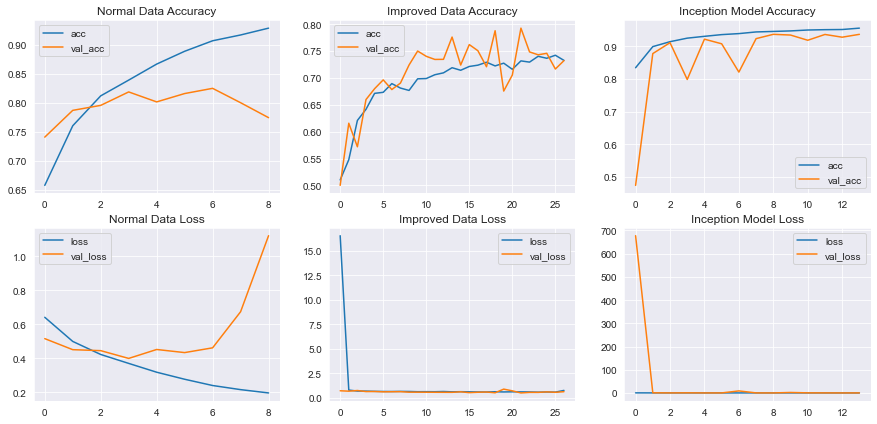

In [233]:
fig, ax = plt.subplots(2,3, figsize=(15,7))

# Normal Model plot
ax[0,0].set_title('Normal Data Accuracy')
ax[0,0].plot(hist.history['accuracy'])
ax[0,0].plot(hist.history['val_accuracy'])
ax[0,0].legend(['acc','val_acc'])
ax[1,0].set_title('Normal Data Loss')
ax[1,0].plot(hist.history['loss'])
ax[1,0].plot(hist.history['val_loss'])
ax[1,0].legend(['loss', 'val_loss'])

# Improved Model plot
ax[0,1].set_title('Improved Data Accuracy')
ax[0,1].plot(improved_data_hist.history['accuracy'])
ax[0,1].plot(improved_data_hist.history['val_accuracy'])
ax[0,1].legend(['acc','val_acc'])
ax[1,1].set_title('Improved Data Loss')
ax[1,1].plot(improved_data_hist.history['loss'])
ax[1,1].plot(improved_data_hist.history['val_loss'])
ax[1,1].legend(['loss', 'val_loss'])

# Transfer Learning model plot
ax[0,2].set_title('Inception Model Accuracy')
ax[0,2].plot(vgg_hist.history['accuracy'])
ax[0,2].plot(vgg_hist.history['val_accuracy'])
ax[0,2].legend(['acc','val_acc'])
# .show()
ax[1,2].set_title('Inception Model Loss')
ax[1,2].plot(vgg_hist.history['loss'])
ax[1,2].plot(vgg_hist.history['val_loss'])
ax[1,2].legend(['loss', 'val_loss'])

## 9. Let's play with images

In [241]:
import warnings
warnings.filterwarnings('ignore')

FileUpload(value={}, description='Upload', multiple=True)

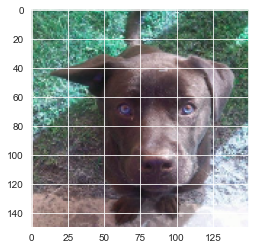

Normal Data model: Dog
Improved Data model: Dog
Transfer Learning model: Dog


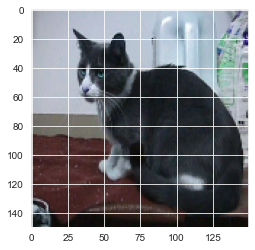

Normal Data model: Cat
Improved Data model: Dog
Transfer Learning model: Cat


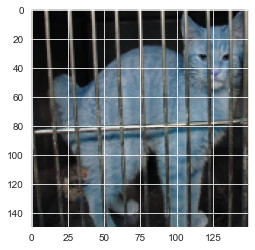

Normal Data model: Cat
Improved Data model: Cat
Transfer Learning model: Cat


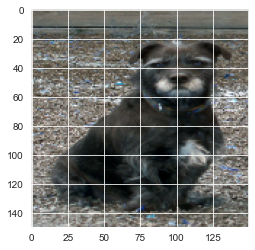

Normal Data model: Dog
Improved Data model: Dog
Transfer Learning model: Dog


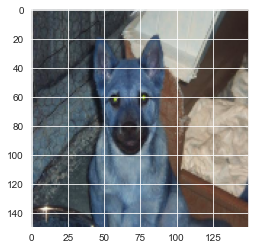

Normal Data model: Dog
Improved Data model: Cat
Transfer Learning model: Dog


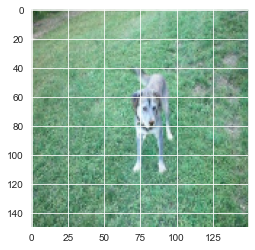

Normal Data model: Dog
Improved Data model: Dog
Transfer Learning model: Dog


In [242]:
upload = FileUpload(accept='', multiple=True)
display(upload)

def pred_data(pred_data):
    if pred_data > 0.5:
        return 'Dog'
    else:
        return 'Cat'

def on_upload_change(change):
    for file_name in upload.value:
        content = upload.value[file_name]['content']
        img = np.array(Image.open(io.BytesIO(bytearray(content))))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (150,150))
        plt.imshow(img)
        plt.show()
        img = np.expand_dims(img, axis=0)
        
        # Normal Data Prediction
        normal_data_pred = normal_data_model.predict(img)
        print('Normal Data model:', pred_data(normal_data_pred))
        
        # Improved Data Prediction
        improved_data_pred = improved_data_model.predict(img)
        print('Improved Data model:', pred_data(improved_data_pred))
        
        # Transfer model prediction
        transfer_pred = final_inception.predict(img)
        print('Transfer Learning model:', pred_data(transfer_pred))
        
upload.observe(on_upload_change,'value')